### Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification


In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9828666666666668


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.01, 0.99],
       ...,
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.32, 0.68]])

#### Logistic Regression

In [9]:
# Default probability is 0.5

from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9847777777777779


In [13]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.96,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.99,0.966929,0.538202,0.8
3,0.91,0.761539,0.509875,0.8
4,0.56,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,0.98,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [14]:
final_prediction

0      0.877762
1      0.118323
2      0.823783
3      0.745353
4      0.557447
         ...   
595    0.121340
596    0.115345
597    0.874197
598    0.165717
599    0.837357
Length: 600, dtype: float64

In [15]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91217349, 0.91217349, 0.9109413 , 0.91077475, 0.81457397,
       0.8130558 , 0.80032099, 0.79912833, 0.78797465, 0.78571156,
       0.76820853, 0.76787124, 0.74026402, 0.73137362, 0.69294088,
       0.69143711, 0.6692442 , 0.66493537, 0.60406376, 0.59986186,
       0.59962652, 0.58675354, 0.58396627, 0.57800386, 0.55744674,
       0.53719563, 0.51365858, 0.46616892, 0.45919266, 0.45222765,
       0.4296034 , 0.38340767, 0.38129719, 0.34933098, 0.34836612,
       0.24349466, 0.24140421, 0.23198424, 0.22896893, 0.20688001,
       0.20598417, 0.12291893, 0.1228351 , 0.10625332])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
29,0.452228,0.961667
30,0.429603,0.960000
28,0.459193,0.960000
27,0.466169,0.958333
26,0.513659,0.956667


In [17]:
accuracy_ls

,thresholds,accuracy
29,0.452228,0.961667
30,0.429603,0.960000
28,0.459193,0.960000
27,0.466169,0.958333
26,0.513659,0.956667
24,0.557447,0.955000
25,0.537196,0.953333
21,0.586754,0.946667
19,0.599862,0.946667
22,0.583966,0.945000


In [18]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

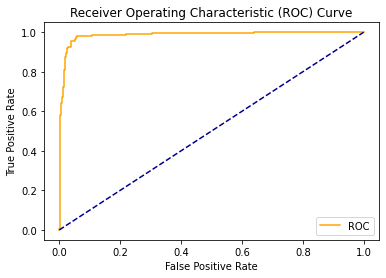

In [19]:
plot_roc_curve(fpr,tpr)